# 1. Introduction

<table class="tfo-notebook-buttons" align="left">
  
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/pantelis/PRML/blob/master/notebooks/ch01_Introduction.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g6c9dDT8MO5BRGs4AVHBWV7BsY6n2fdz2Fi3OA65QebCZJSZkvBBEQ
Mounted at /content/drive


In [ ]:
# You need to adjust the directory names below for your own account
# e.g. you may elect to create ms-notebooks dir or not

# Execute this cell once

# 1. Download the repo and set it as the current directory
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks
!git clone https://github.com/pantelis/PRML
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML

# 2. install the project/module
!python setup.py install



In [ ]:
# 3. Add the project directory to the path
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML
import os, sys
sys.path.append(os.getcwd())

/content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML


In [ ]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import PolynomialFeature
from prml.linear import (
    LinearRegression,
    RidgeRegression,
    BayesianRegression
)

np.random.seed(1234)

## 1.1. Example: Polynomial Curve Fitting

The cell below defines $p_{data}(y|x)$ and generates the $\hat p_{data}(y|x)$

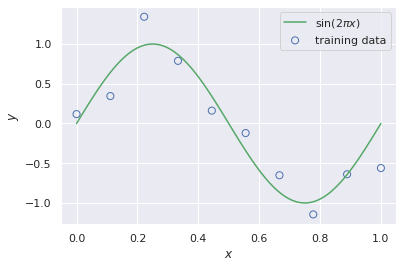

In [ ]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size) # p(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape) 
    return x, y

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

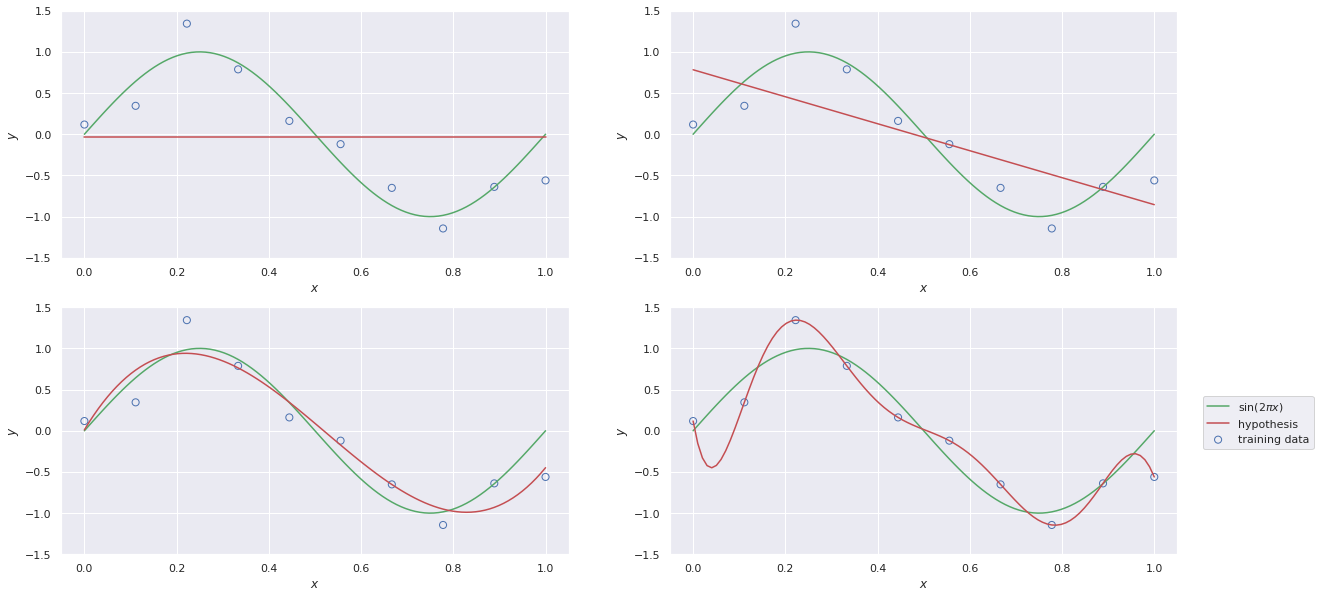

In [ ]:
plt.subplots(figsize=(20, 10))
for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="hypothesis")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
    plt.xlabel('$x$')
    plt.ylabel('$y$') 
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

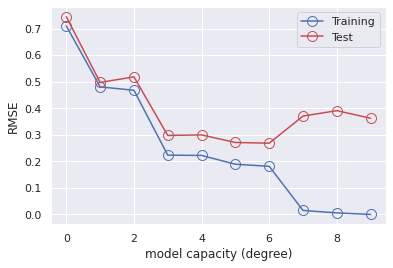

M= 1
0.7830194231723844
-1.637880592568158


M= 3
0.011333603222680925
9.292161573204558
-26.789442211208684
17.03728652095905


M= 6
0.08703797657243809
-2.363048917709911
94.52286191924347
-428.17494322673235
736.7976875626282
-563.0955490349781
161.6944604312044


M= 9
0.11785879093351348
-32.23142912661565
552.5761928899434
-2728.573324392581
4762.784302052687
2031.2888614077856
-19359.536517162094
28382.47070393645
-17856.184235302073
4246.726915667057


||W||^2
M= 1 1.8154261903411646
M= 3 33.08002027112504
M= 6 1038.4442562233153
M= 9 39392.84253289236


In [ ]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []
all_models= [] #array to print out the weights

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))
    all_models.append(model.w)

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

#Parameter Table (20 points) 
for i in [1,3,6,9]:
  print("M=",i)
  for j in all_models[i]:
    print (j)
  print ("\n")

print("||W||^2")
for i in [1,3,6,9]:
  print("M=",i, np.linalg.norm(all_models[i]))


**Loss function (15 points):** is called RMSE because the function is taking the sum between the squared errors- which is the difference between expected and actual values.The errors are squared in order to eliminate a negative result, and the summation is averaged then. The square root is offered because it bound the result closer to 0 and 1s so which gives better approximation to how to evaluate the perforamnce of model.

**Model complexity (15 points)**: when M=3 the error between the training and test dataset is very low, which continues up to M=6 as the model capacity increases. On the other, when M=9 the outcome of test dataset is unpredictable, which may result in high levels of error. In conculsion, the model at M=3  will perfrom much better than when M=9.


#### Regularization

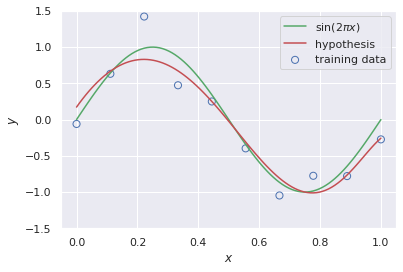

In [ ]:
feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

#y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="hypothesis")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.show()

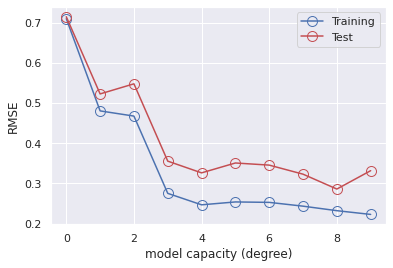

In [ ]:
def rmse_1(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []
all_models= [] #array to print out the weights

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = RidgeRegression(alpha=1e-3)
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))
    all_models.append(model.w)

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

**Regularization (20 points):** After the regularization, the test dataset output appeared to be more shrunk and both training and test data appear to be approaching zero as model capacity increases.

### 1.2.6 Bayesian curve fitting

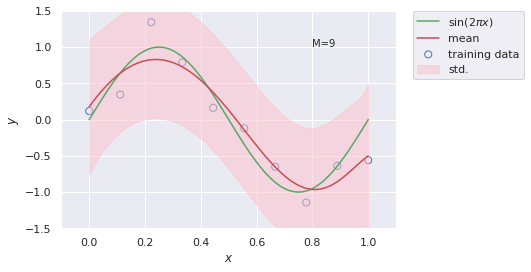

In [ ]:
model = BayesianRegression(alpha=2e-3, beta=2)
model.fit(X_train, y_train)

y, y_err = model.predict(X_test, return_std=True)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="mean")
plt.fill_between(x_test, y - y_err, y + y_err, color="pink", label="std.", alpha=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(0.8, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
plt.show()